Locating project "calibration-module" within "C:\Users\narayas2\Documents\MATLAB\projects".
  Found at "C:\Users\narayas2\Documents\MATLAB\projects\calibration-module".
Updating "ToolboxRegistry".
Already up-to-date.
Updating "calibration-module".
Host key verification failed. 
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
Updating "matlab-persistence".
Already up-to-date.
Found "jsonlab_v1.2" and skipping update.
Updating "logging4matlab".
Already up-to-date.
Updating "MatlabQuery".
Already up-to-date.
Updating "mdepin".
Already up-to-date.
Adding "ToolboxToolbox" to path at "C:\Users\narayas2\Documents\MATLAB\ToolboxToolbox".
Adding "calibration-module" to path at "C:\Users\narayas2\Documents\MATLAB\projects\calibration-module".
Adding "matlab-persistence" to path at "C:\Users\narayas2\Documents\MATLAB\toolboxes\matlab-persistence".
Adding "jsonlab_v1.2" to path at "C:\Users\narayas2\Documents\MATLAB\tool

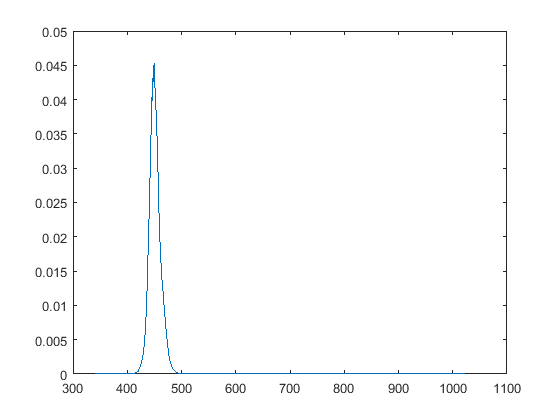

In [3]:
tbUseProject('calibration-module');

close all;
clc;
clear;
import ala_laurila_lab.*;

LAMDA_MAX = 497;                        % Toda et al. 1999
ROD_PHOTORECEPTOR_AREA = 0.5 * 1e-12;   % um^2, collective area of rod (Murphy & Rieke (2011))
spectrum = ala_laurila_lab.util.loadSpectralFile('src/test/resources/spectrum_aalto_rig', 'projector');


figure;
plot(spectrum.wavelength, spectrum.getNormalizedPowerSpectrum())

In [7]:
ledCurrent = 100;
radius = 1000 * 10^-6/2; 
area = pi*(radius)^2; 


ndf1 = ala_laurila_lab.entity.NDFMeasurement('D1A');
ndf1.ledInput = ledCurrent;
ndf1.ledInputExponent = 1;
ndf1.powers = 0.260;
ndf1.powerExponent = 1e-3;
ndf1.powerWithNdf = 31;
ndf1.powerWithNdfExponent =  1e-6;
ndf1.referenceInput = ledCurrent;

od1 = ndf1.opticalDensity
trans1 = 10^(-ndf1.opticalDensity);

ndf3 = ala_laurila_lab.entity.NDFMeasurement('D3A');
ndf3.ledInput = ledCurrent;
ndf3.ledInputExponent = 1;
ndf3.powers = 0.260;
ndf3.powerExponent =  1e-3;
ndf3.powerWithNdf = 51.6 ;
ndf3.powerWithNdfExponent =  1e-9;
ndf3.referenceInput = ledCurrent;

od3 = ndf3.opticalDensity
trans3 = 10^(-ndf3.opticalDensity);

ndf5 = ala_laurila_lab.entity.NDFMeasurement('D5A');
ndf5.ledInput = ledCurrent;
ndf5.ledInputExponent = 1;
ndf5.powers = 0.260;
ndf5.powerExponent = 1e-3;
ndf5.powerWithNdf = 0.0013;
ndf5.powerWithNdfExponent = 1e-6;
ndf5.referenceInput = ledCurrent;

od5 = ndf5.opticalDensity
trans5 = 10^(-ndf5.opticalDensity);



od1 =

    0.9236


od3 =

    3.7023


od5 =

    5.3010




In [11]:
powerPerArea = @(power) power * 10^-3 / area;
powerSpectrumPerArea = @(powerPerUnitArea) spectrum.getNormalizedPowerSpectrum() * powerPerUnitArea;
rstarPerSecond = @(powerPerUnitArea) util.photonToIsomerisation(powerSpectrumPerArea(powerPerUnitArea), spectrum.wavelength, LAMDA_MAX, ROD_PHOTORECEPTOR_AREA);

disp('LED current 100 and spot size of 1000 micron')

rstar = rstarPerSecond(powerPerArea(0.16935))
rstar_ndf_1 = rstar * trans1
rstar_ndf_3 = rstar * trans3
rstar_ndf_5 = rstar * trans5



LED current 100 and spot size of 1000 micron

rstar =

   1.5122e+08


rstar_ndf_1 =

   1.8030e+07


rstar_ndf_3 =

   3.0010e+04


rstar_ndf_5 =

  756.0766




In [12]:
linearity = loadjson('src/test/resources/projector-linearity.json');

fprintf('| Ledurrents \t | rstarPerSecond | ndf 0.92 | ndf 3.7 | ndf 5.3 |\n');
fprintf('| --------- | --------- | --------- | --------- | --------- |\n')
for i = 1 : numel(linearity.ledCurrents)
     rstar = rstarPerSecond(powerPerArea(linearity.powerInMilliWattFor(i)));  % in milli watts for 1000 micron and no ndf
     rstar = round(rstar, 2);
     fprintf('| %s \t | %s | %s \t | %s \t | %s \t |\n', num2str(linearity.ledCurrents(i)), num2str(round(rstar, 2)) , num2str(round(rstar * trans1, 2)), num2str(round(rstar * trans3, 2)), num2str(round(rstar * trans5, 2)));
end

| Ledurrents 	 | rstarPerSecond | ndf 0.92 | ndf 3.7 | ndf 5.3 |
| --------- | --------- | --------- | --------- | --------- |
| 0 	 | -289823.86 | -34555.92 	 | -57.52 	 | -1.45 	 |
| 1 	 | -287359.45 | -34262.09 	 | -57.03 	 | -1.44 	 |
| 2 	 | -291962.78 | -34810.95 	 | -57.94 	 | -1.46 	 |
| 3 	 | -286103.99 | -34112.4 	 | -56.78 	 | -1.43 	 |
| 4 	 | -288010.42 | -34339.7 	 | -57.16 	 | -1.44 	 |
| 5 	 | -287591.94 | -34289.81 	 | -57.08 	 | -1.44 	 |
| 6 	 | 137030.47 | 16338.25 	 | 27.2 	 | 0.69 	 |
| 7 	 | 1636321.41 | 195099.86 	 | 324.75 	 | 8.18 	 |
| 8 	 | 3420181.9 | 407790.92 	 | 678.77 	 | 17.1 	 |
| 9 	 | 5623178 | 670455.84 	 | 1115.98 	 | 28.12 	 |
| 10 	 | 7408572.94 | 883329.85 	 | 1470.32 	 | 37.04 	 |
| 11 	 | 9169695.77 | 1093309.88 	 | 1819.83 	 | 45.85 	 |
| 12 	 | 10971411.61 | 1308129.85 	 | 2177.4 	 | 54.86 	 |
| 13 	 | 12818835.27 | 1528399.59 	 | 2544.05 	 | 64.09 	 |
| 14 	 | 14495377.7 | 1728295.03 	 | 2876.77 	 | 72.48 	 |
| 15 	 | 16147694.53 | 1925302